# Chronic Disease Project: Predicting Heart Disease and Diabetes


**Project Purpose:**
While many Kaggle projects focus on predicting heart disease or diabetes using CDC data, I identified a gap—none simultaneously predict both conditions. Given that heart disease and diabetes are the most prevalent chronic diseases in the US, accurate predictions for both can empower individuals to assess their health status and take preventive measures. Therefore, my project, utilizing the latest dataset, aims to predict these two significant chronic diseases concurrently. Additionally, I plan to develop a website where individuals can input their information to receive predictions.

**Project Focus:**
The project faces two main challenges: class imbalance and the complexity of a dataset with 39 variables (excluding the target variable). Addressing these challenges is crucial for optimal performance. The key focus areas include:

1. **Address Class Imbalance:**
   - Strategy: Employ oversampling or utilize a model with class weights.
   - Rationale: The imbalance in class distribution needs careful consideration to enhance model accuracy.

2. **Feature Selection:**
   - Goal: Reduce the number of variables to less than 20 for user-friendly interaction.
   - Rationale: A concise set of features enhances the interpretability of the model and simplifies the input process for individuals using the website.

Decision Paths for Addressing Class Imbalance and Feature Selection:
   - Path A: Oversample all minority instances to match the majority count, followed by feature selection.
   - Path B: Oversample with a specific ratio (1:2), conduct feature selection, and implement a class-weighted model.
   - Path C: Direct feature selection followed by a class-weighted model.

Each path has its pros and cons. Path A preserves the original dataset but might be slower due to increased instances. Paths B and C could be faster but involve potential trade-offs. The ultimate decision will be based on evaluating the performance score and running time to determine the most effective path.

**Data Source:**
The dataset comprises 2022 annual CDC survey data, encompassing 400k+ adults and their health-related information. Originally part of the Behavioral Risk Factor Surveillance System (BRFSS), the dataset underwent preprocessing by KAMIL PYTLAK, reducing nearly 300 variables to 40. Details on preprocessing steps are available in the [preprocessing notebook](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data).

For additional information:
- Dataset Details: [CDC Annual Data 2022](https://www.cdc.gov/brfss/annual_data/annual_2022.html)
- Variable Descriptions: [CDC Calculated Variables](https://www.cdc.gov/brfss/annual_data/2022/pdf/2022-calculated-variables-version4-508.pdf) 



# Step1. Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv")

In [3]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# Step 2. Data Exploration (Initial EDA and data cleaning)
- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
# Check distributions of numerical variables
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [6]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

#### *Initial Observations*

After reviewing the basic information about the data, several key thoughts and considerations have emerged:

- To predict both heart disease and diabetes, a composite target variable should be created from 'HadHeartAttack' and 'HadDiabetes.'
- It's essential to identify crucial factors associated with both diabetes and heart disease for effective feature selection.
- Considering the extensive number of variables, a detailed Exploratory Data Analysis (EDA) for each variable can be conducted in the evaluation phase after feature selection to avoid overwhelming initial observations.
- Notably, there is no variable measuring blood pressure and high cholesterol, despite their significance as high-risk factors for heart disease recognized by the CDC. Consideration should be given to addressing this gap in the dataset.

### Check missing values & duplicates

In [7]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [8]:
df.duplicated().sum()

9

In [9]:
df[df.duplicated(keep=False)].head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5294,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
5702,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
86986,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87371,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87555,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No


Given the presence of the same numerous continuous variables spanning 40 columns, the probability of these observations occurring by mere coincidence appears highly improbable. Therefore, I will proceed by eliminating them from consideration.

In [10]:
df0 = df.drop_duplicates(keep='first')
df0.shape

(246013, 40)

### Check the distributions of chronic disease variables

In [11]:
df0['HadHeartAttack'].value_counts(normalize=True)

HadHeartAttack
No     0.945389
Yes    0.054611
Name: proportion, dtype: float64

In [12]:
df0['HadDiabetes'].value_counts(normalize=True)

HadDiabetes
No                                         0.832586
Yes                                        0.137436
No, pre-diabetes or borderline diabetes    0.021918
Yes, but only during pregnancy (female)    0.008061
Name: proportion, dtype: float64

Despite 'HadDiabetes' having four distinct values, it is essential to note that prediabetes and pregnancy will be excluded from consideration. Consequently, responses of 'Yes' and 'No' across these four categories will be consolidated into a singular 'Yes' and 'No' classification.

### Simplify Diabete Values

In [13]:
df0['HadDiabetes'] = df0['HadDiabetes'].apply(lambda x: 'Yes' if 'Yes' in x else 'No')
df0['HadDiabetes'].value_counts()

/tmp/ipykernel_43/1635230994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['HadDiabetes'] = df0['HadDiabetes'].apply(lambda x: 'Yes' if 'Yes' in x else 'No')


HadDiabetes
No     210219
Yes     35794
Name: count, dtype: int64

### Create a target variable 'ChronicDisease'

- Clase 1: Heart disease
- Clase 2: Diabetes
- Clase 3: Heart disease & Diabetes
- Clase 4: None of them

In [14]:
df1 = df0.copy()

In [15]:
# Create a column 'ChronicDisease'
def create_chronic_disease(df, disease_heart, disease_diabetes):
    # Case 1: only Heart disease
    if (df[disease_heart] == 'Yes') & ('No' in df[disease_diabetes]):
        return 'Heart disease'
    # Case 2: Diabetes
    elif (df[disease_heart] == 'No') & ('Yes' in df[disease_diabetes]):
        return 'Diabetes'
    # Case 3: Both Heart disease and Diabetes
    elif (df[disease_heart] == 'Yes') & ('Yes' in df[disease_diabetes]):
        return 'Heart disease & Diabetes'
    # Case 4: No chronic disease
    else:
        return 'No'

# Applying the function to create the 'ChronicDisease' column
df1['ChronicDisease'] = df1.apply(lambda row: create_chronic_disease(row, 'HadHeartAttack', 'HadDiabetes'), axis=1)

df1[['HadHeartAttack', 'HadDiabetes', 'ChronicDisease']].head()

,HadHeartAttack,HadDiabetes,ChronicDisease
0,No,No,No
1,No,Yes,Diabetes
2,No,No,No
3,No,No,No
4,No,No,No


In [16]:
df1['ChronicDisease'].value_counts(normalize=True)

ChronicDisease
No                          0.819038
Diabetes                    0.126351
Heart disease               0.035466
Heart disease & Diabetes    0.019145
Name: proportion, dtype: float64

In [17]:
# Drop the original two target variables
df1.drop(columns=['HadHeartAttack', 'HadDiabetes'], inplace=True)

df1.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,ChronicDisease
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Diabetes
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No


### Outliers and Scaling

In [18]:
# Divide columns to numerical and categorical features
num_columns = ['BMI', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays','HeightInMeters', 'WeightInKilograms']

cat_columns = list(set(df1.columns) - set(num_columns))
cat_columns.remove('ChronicDisease') #remove the target variable
target_column = ['ChronicDisease']
cat_columns
target_column
# cat_columns2 = df0.select_dtypes(exclude=['number']).columns

['ChronicDisease']

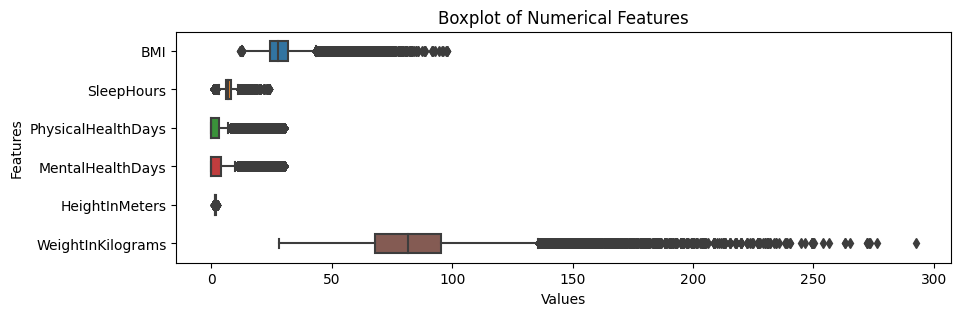

In [19]:
# Use the entire DataFrame for the 'data' parameter
plt.figure(figsize=(10, 3))
sns.boxplot(data=df1[num_columns], orient='h', width=.5)
plt.ylabel('Features')
plt.xlabel('Values')
plt.title('Boxplot of Numerical Features')
plt.show()

A significant number of numerical variables exhibit numerous extreme outliers. The strategy involves scaling these variables after dividing the dataset into training and testing sets. 

# Step 3. Data Preprocessing

- Address any preprocessing steps needed for specific dataset, such as handling missing values, encoding categorical variables, and scaling numerical features.

### Encoding
- Utilizing OrdinalEncoder() is intended for the independent variables (X). When the categories parameter is not specified in OrdinalEncoder, its behavior is akin to that of LabelEncoder. Both methods assign integer labels based on the order in which unique values are encountered in the training data.
- For the dependent variable (Y), LabelEncoder() is employed.

An initial attempt involved encoding all categorical variables, including the target variable, simultaneously using OrdinalEncoder() before splitting X and Y. However, this approach led to a warning during the mutual information step. The warning arose because all the dtype for categorical features was float64 instead of discrete values, such as integers. Consequently, the target variable will be converted separately using LabelEncoder().

**Note**: The fit and fit_transform methods in LabelEncoder do not adhere to the standard scikit-learn convention for these methods (fit(X[, y]) and fit_transform(X[, y])). The fit and fit_transform methods in the LabelEncoder only accept one argument: fit(y) and fit_transform(y). As a result, LabelEncoder cannot be used inside a Pipeline or a ColumnTransform. Additionally, attempts to convert the dtype of the target variable in the column transformer proved unsuccessful, as the transformer alters the entire dtype of the dataframe.


In [20]:
# Make pipeline to encode categorical variables except the target variable
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

encoder = make_column_transformer(
    ( OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan,) #it converts to float64
     ,cat_columns ),
    remainder="passthrough",
    verbose_feature_names_out=False,
)

df1_encoded = encoder.fit_transform(df1)

# [Option] Convert the result back to a DataFrame for better visualization
df1_encoded = pd.DataFrame(df1_encoded, columns=encoder.get_feature_names_out())
df1_encoded.head()

,HadDepressiveDisorder,HadAngina,HadAsthma,GeneralHealth,HadSkinCancer,DifficultyConcentrating,AlcoholDrinkers,DifficultyDressingBathing,HadArthritis,ECigaretteUsage,...,HIVTesting,ChestScan,HadStroke,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,ChronicDisease
0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,9.0,1.6,71.67,27.99,No
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.78,95.25,30.13,Diabetes
2,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,8.0,1.85,108.86,31.66,No
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,5.0,0.0,9.0,1.7,90.72,31.32,No
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,15.0,5.0,1.55,79.38,33.07,No


In [21]:
# Encode Target Variable
y_encoder = LabelEncoder()
df1_encoded['ChronicDisease']  = y_encoder.fit_transform(df1_encoded['ChronicDisease'] )
df1_encoded.head()

,HadDepressiveDisorder,HadAngina,HadAsthma,GeneralHealth,HadSkinCancer,DifficultyConcentrating,AlcoholDrinkers,DifficultyDressingBathing,HadArthritis,ECigaretteUsage,...,HIVTesting,ChestScan,HadStroke,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,ChronicDisease
0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,9.0,1.6,71.67,27.99,3
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.78,95.25,30.13,0
2,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,8.0,1.85,108.86,31.66,3
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,5.0,0.0,9.0,1.7,90.72,31.32,3
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,15.0,5.0,1.55,79.38,33.07,3


In [22]:
# Split to X and y
X = df1_encoded.drop('ChronicDisease',axis=1)
y = df1_encoded['ChronicDisease']

Class=0, n=31084 (12.635%)
Class=1, n=8725 (3.547%)
Class=2, n=4710 (1.915%)
Class=3, n=201494 (81.904%)


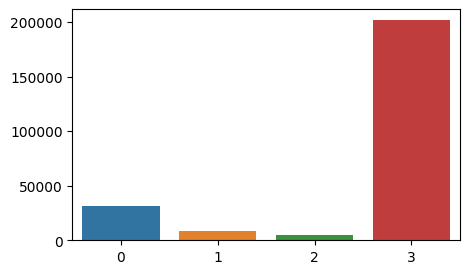

In [23]:
from collections import Counter

# summarize distribution
counter = Counter(y)
sorted_keys = sorted(Counter(y))

for key in sorted_keys:
    value = counter[key]
    per = value / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (key, value, per))

plt.figure(figsize=(5,3))
sns.barplot(x=list(counter.keys()), y=list(counter.values()))
plt.show()

In the realm of Exploratory Data Analysis (EDA), the abundance of features can be overwhelming, necessitating a strategic approach to selection. Given the imbalanced nature of classes within the target variable, prioritizing class balance through resampling is imperative. Consequently, the initial focus will be on addressing class imbalance before embarking on the process of feature selection.

### Train/test split


In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

# Split the temporary data into validation (50%) and test (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True, stratify=y_temp, random_state=42)

print(f"Train Set: {len(X_train)} samples")
print(f"Validation Set: {len(X_val)} samples")
print(f"Test Set: {len(X_test)} samples")

Train Set: 196810 samples
Validation Set: 24601 samples
Test Set: 24602 samples


### Scaling

The process of scaling holds significant importance and should be executed after splitting the dataset into training and testing sets. This precautionary measure aims to prevent data leakage, a situation where information from the test set influences the scaling or preprocessing of the training set.

Here's the sequence of operations:

- Split the Data: Divide your dataset into training and testing sets. The training set is dedicated to model training, while the testing set evaluates its performance.
- Fit the Scaler on the Training Data: Apply your chosen scaling method (e.g., RobustScaler, MinMaxScaler) exclusively to the training set. This involves calculating parameters like mean or standard deviation based on the training data.
- Transform the Training Data: Implement the scaling transformation on the training set using the fitted scaler. This step ensures that the scaling aligns with the parameters derived from the training data.
- Fit and Transform the Test Data: Employ the same scaler (fitted on the training set) to transform the test set. This consistency in scaling across both sets promotes fair evaluation and comparison.


***Note:RobustScaler is***
Robust to outliers, as it uses the median and interquartile range (IQR) instead of the mean and standard deviation. Scales features based on the median and the IQR, making it less sensitive to extreme values.
Suitable when your dataset contains numerical features with outliers.

In [25]:
# Scale train and test data
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler instance
scaler = RobustScaler()

X_train_scaled, X_val_scaled, X_test_scaled = X_train.copy(), X_val.copy(), X_test.copy()

# Fit and transform the numerical features in the training set
X_train_scaled[num_columns] = scaler.fit_transform(X_train_scaled[num_columns])

# Transform the numerical features in the validation and test set using the same scaler
X_val_scaled[num_columns] = scaler.transform(X_val_scaled[num_columns])
X_test_scaled[num_columns] = scaler.transform(X_test_scaled[num_columns])

In [26]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196810 entries, 68749 to 102461
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   HadDepressiveDisorder      196810 non-null  object 
 1   HadAngina                  196810 non-null  object 
 2   HadAsthma                  196810 non-null  object 
 3   GeneralHealth              196810 non-null  object 
 4   HadSkinCancer              196810 non-null  object 
 5   DifficultyConcentrating    196810 non-null  object 
 6   AlcoholDrinkers            196810 non-null  object 
 7   DifficultyDressingBathing  196810 non-null  object 
 8   HadArthritis               196810 non-null  object 
 9   ECigaretteUsage            196810 non-null  object 
 10  DeafOrHardOfHearing        196810 non-null  object 
 11  HadCOPD                    196810 non-null  object 
 12  BlindOrVisionDifficulty    196810 non-null  object 
 13  TetanusLast10Tdap          196

# Step 4. Baseline Model
Initiate the model development process by constructing a baseline model, devoid of any feature selection or resampling. The objective is to train a simple model on the dataset, establishing a foundational performance metric. The baseline model may involve default settings without extensive tuning.

When employing feature selection techniques such as Recursive Feature Elimination (RFE), Mutual Information, and SelectFromModel, consider leveraging models that inherently furnish feature importance scores. Random Forest stands out for its capability to provide such scores, and its robustness makes it adept at handling non-linearity effectively. This makes it a suitable choice for feature selection in the initial stages of model development.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Randome Forest
rf = RandomForestClassifier(random_state = 42)

rf_accuracy = cross_val_score(rf, X_train_scaled, y_train,  cv=3, scoring ='accuracy')
rf_f1 = cross_val_score(rf, X_train_scaled, y_train,  cv=3, scoring ='f1_macro')

print(f'rf_accuracy: {round(rf_accuracy.mean(), 3)}  |  rf_f1_macro: {round(rf_f1.mean(), 3)}\n')

rf_accuracy: 0.822  |  rf_f1_macro: 0.34



In [28]:
from sklearn.metrics import f1_score, accuracy_score

rf.fit(X_train_scaled, y_train)
y_val_pred = rf.predict(X_val)

print(f'val Accuracy: {round(accuracy_score(y_val, y_val_pred), 3)}  | val F1 Macro: {round(f1_score(y_val, y_val_pred, average="macro"), 3)}\n')

val Accuracy: 0.769  | val F1 Macro: 0.34



The observed low Accuracy(0.78) and F1 macro score (0.35) from the baseline model indicates suboptimal predictive performance. To assess the impact of resampling and feature selection on model performance, let's proceed with these enhancements.

***Note: Type of F1 Score to Use***

In the context of multiclass classification, the 'average' parameter for scoring should be chosen based on the specific requirements of your analysis. Here are the options:

- **'micro':** Calculate metrics globally by considering all instances together as a single label.
- **'macro':** Calculate metrics for each label and average them without weighting.
- **'weighted':** Calculate metrics for each label and average them, with weights based on the number of true instances for each label.

For imbalanced multiclass classification, especially when predicting minority classes is crucial, using macro-averaged metrics is often more appropriate than weighted metrics. Macro-averaged metrics treat each class equally, making them suitable for imbalanced scenarios.

Reference: [Scikit-Learn Model Evaluation Documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)

# Step 5. Imbalanced Class Handling

**Resampling Methods:**

Addressing multiclass imbalanced targets involves selecting an appropriate SMOTE variant based on class distribution and inter-class relationships. Experimenting with multiple variants and assessing performance through cross-validation or other metrics is advisable.

- **Borderline-SMOTE:** Focuses on generating synthetic samples at the borderline between majority and minority classes, addressing issues when minority class samples are close to majority class samples.
- **ADASYN (Adaptive Synthetic Sampling):** An adaptive SMOTE variant that generates more synthetic samples for harder-to-learn minority class instances.
- **SMOTETomek:** A hybrid technique combining SMOTE and Tomek links to clean overlapping data points for each class.

**Oversampling Strategies:**

Choosing between oversampling all minority instances and oversampling with a specified ratio depends on the degree of class imbalance. Common ratios include 1:1 (balanced) and various imbalanced ratios like 2:1 or 3:1. For large datasets where oversampling might pose computational challenges, using class weights is a practical alternative. Combining oversampling and class weights is also viable, allowing for experimentation with different strategies and comparison of opportunity costs.

Reference:
- [SMOTE Oversampling for Imbalanced Classification](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
- [Overcoming Class Imbalance Using SMOTE Techniques](https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/)

***Note: Why Resample After Splitting Train and Test Dataset?***
SMOTE and related techniques are applied exclusively to the training dataset to ensure proper fitting of the algorithm. The test data remains unchanged to accurately represent the original, imbalanced class distribution. Therefore, it's crucial to split X and y into train and test before applying SMOTE, resampling only the training data.

***Note: Why Resample Before Feature Selection?***
In an imbalanced dataset, models may prioritize learning patterns for accurate predictions in the majority class, potentially overlooking essential information for minority class predictions. Features associated with the majority class might dominate the selection process. Resampling before feature selection helps ensure that the model considers minority class information during training.

In [29]:
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_score
from collections import Counter

In [30]:
Counter(y_train)

Counter({3: 161195, 0: 24867, 1: 6980, 2: 3768})

In [31]:
# Make function to count classes in y
def class_counter(y):
    counter = Counter(y)
    sorted_keys = sorted(Counter(y))

    class_counter_list = []
    for key in sorted_keys:
        value = counter[key]
        per = value / len(y) * 100
        class_counter_list.append('Class=%d, n=%d (%.3f%%)' % (key, value, per))

    return class_counter_list

In [32]:
# Original y_train class distribution
class_counter(y_train)

['Class=0, n=24867 (12.635%)',
 'Class=1, n=6980 (3.547%)',
 'Class=2, n=3768 (1.915%)',
 'Class=3, n=161195 (81.904%)']

Considering that classes 0 to 2 hold equal importance and oversampling to the majority class might result in an excessive number of instances, a balanced approach is warranted. Instead of oversampling all the way to the number of the majority class, a pragmatic choice would be to oversample to approximately half the number of instances in the majority class. This strategy aims to balance the representation of minority classes while avoiding an overwhelming increase in the dataset size.

In [33]:
# Specify the desired ratio based on the original class distribution
class_distribution = Counter(y_train)
desired_ratio = {key: class_distribution[key] for key in class_distribution}
desired_ratio[0.0] = int(desired_ratio[3.0]/2)  # oversample class 0 to half of class 3
desired_ratio[1.0] = int(desired_ratio[3.0]/2)  # oversample class 0 to half of class 3
desired_ratio[2.0] = int(desired_ratio[3.0]/2)  # oversample class 0 to half of class 3

desired_ratio

{1: 80597, 3: 161195, 2: 80597, 0: 80597}

In [34]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

### Method 1. BorderlineSMOTE

#### Path A. Oversampling all

Cross_Val_Score from Training Set

In [35]:
## BorderlineSMOTE for all minority

# Apply BorderlineSMOTE to the training data
BLsmote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

X_train_BLsmote_a, y_train_BLsmote_a = BLsmote.fit_resample(X_train_scaled, y_train)
print('Class proportion: ', class_counter(y_train_BLsmote_a))

# Train your classifier on the oversampled data
BLsmote_accuracy = cross_val_score(rf, X_train_BLsmote_a, y_train_BLsmote_a,  cv=3, scoring ='accuracy')
BLsmote_f1 = cross_val_score(rf, X_train_BLsmote_a, y_train_BLsmote_a,  cv=3, scoring ='f1_macro')

print(f'rf_accuracy: {round(BLsmote_accuracy.mean(), 3)}  |  rf_f1_macro: {round(BLsmote_f1.mean(), 3)}\n')

Class proportion:  ['Class=0, n=161195 (25.000%)', 'Class=1, n=161195 (25.000%)', 'Class=2, n=161195 (25.000%)', 'Class=3, n=161195 (25.000%)']
rf_accuracy: 0.931  |  rf_f1_macro: 0.93



Score from Validation Set

In [36]:
# Apply BorderlineSMOTE to the training data
BLsmote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

X_train_BLsmote_a, y_train_BLsmote_a = BLsmote.fit_resample(X_train_scaled, y_train)
print('Class proportion: ', class_counter(y_train_BLsmote_a))

rf.fit(X_train_BLsmote_a, y_train_BLsmote_a)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

Class proportion:  ['Class=0, n=161195 (25.000%)', 'Class=1, n=161195 (25.000%)', 'Class=2, n=161195 (25.000%)', 'Class=3, n=161195 (25.000%)']
              precision    recall  f1-score   support

           0       0.30      0.24      0.27      3108
           1       0.33      0.17      0.22       873
           2       0.32      0.14      0.19       471
           3       0.87      0.93      0.89     20149

    accuracy                           0.80     24601
   macro avg       0.46      0.37      0.39     24601
weighted avg       0.77      0.80      0.78     24601



cross_val_score and score from validation set are very different. The model is overfitting so much that it doesn't capture the real prediction performance. Therefore, a separate validation set will be used instead of cross_val_score.

#### Path B. Oversampling ratios

In [37]:
# Apply BorderlineSMOTE to the training data
BLsmote = BorderlineSMOTE(sampling_strategy=desired_ratio, random_state=42)

X_train_BLsmote_b, y_train_BLsmote_b = BLsmote.fit_resample(X_train_scaled, y_train)
print('Class proportion: ', class_counter(y_train_BLsmote_b))

rf.fit(X_train_BLsmote_b, y_train_BLsmote_b)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

Class proportion:  ['Class=0, n=80597 (20.000%)', 'Class=1, n=80597 (20.000%)', 'Class=2, n=80597 (20.000%)', 'Class=3, n=161195 (40.000%)']
              precision    recall  f1-score   support

           0       0.30      0.24      0.26      3108
           1       0.34      0.16      0.22       873
           2       0.29      0.14      0.19       471
           3       0.86      0.92      0.89     20149

    accuracy                           0.79     24601
   macro avg       0.45      0.37      0.39     24601
weighted avg       0.76      0.79      0.78     24601



### Method 2. ADASYN

In [38]:
adsmote = ADASYN(sampling_strategy='auto', random_state=42)
# adsmote = ADASYN(sampling_strategy=desired_ratio, random_state=42)

X_train_adsmote_a, y_train_adsmote_a = adsmote.fit_resample(X_train_scaled, y_train)
print(class_counter(y_train_adsmote_a))

rf.fit(X_train_adsmote_a, y_train_adsmote_a)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

['Class=0, n=165493 (25.407%)', 'Class=1, n=161784 (24.838%)', 'Class=2, n=162897 (25.008%)', 'Class=3, n=161195 (24.747%)']
              precision    recall  f1-score   support

           0       0.31      0.23      0.26      3108
           1       0.32      0.19      0.24       873
           2       0.25      0.14      0.18       471
           3       0.87      0.93      0.89     20149

    accuracy                           0.80     24601
   macro avg       0.44      0.37      0.39     24601
weighted avg       0.76      0.80      0.78     24601



In [39]:

adsmote = ADASYN(sampling_strategy=desired_ratio, random_state=42)

X_train_adsmote_b, y_train_adsmote_b = adsmote.fit_resample(X_train_scaled, y_train)
print(class_counter(y_train_adsmote_b))

rf.fit(X_train_adsmote_b, y_train_adsmote_b)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

['Class=0, n=81421 (20.237%)', 'Class=1, n=78649 (19.548%)', 'Class=2, n=81074 (20.151%)', 'Class=3, n=161195 (40.064%)']
              precision    recall  f1-score   support

           0       0.30      0.24      0.27      3108
           1       0.34      0.19      0.24       873
           2       0.27      0.15      0.19       471
           3       0.87      0.92      0.89     20149

    accuracy                           0.79     24601
   macro avg       0.44      0.37      0.40     24601
weighted avg       0.76      0.79      0.78     24601



### Method 3. SMOTETomek

In [40]:
TMsmote = SMOTETomek(sampling_strategy='auto', random_state=42)
# TMsmote = SMOTETomek(sampling_strategy=desired_ratio, random_state=42)

X_train_TMsmote, y_train_TMsmote = TMsmote.fit_resample(X_train_scaled, y_train)
print(class_counter(y_train_TMsmote))

rf.fit(X_train_TMsmote, y_train_TMsmote)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

['Class=0, n=161154 (24.997%)', 'Class=1, n=161194 (25.003%)', 'Class=2, n=161195 (25.003%)', 'Class=3, n=161153 (24.997%)']
              precision    recall  f1-score   support

           0       0.31      0.23      0.26      3108
           1       0.35      0.21      0.26       873
           2       0.26      0.15      0.19       471
           3       0.87      0.93      0.90     20149

    accuracy                           0.80     24601
   macro avg       0.44      0.38      0.40     24601
weighted avg       0.77      0.80      0.78     24601



In [41]:
TMsmote = SMOTETomek(sampling_strategy=desired_ratio, random_state=42)

X_train_TMsmote, y_train_TMsmote = TMsmote.fit_resample(X_train_scaled, y_train)
print(class_counter(y_train_TMsmote))

rf.fit(X_train_TMsmote, y_train_TMsmote)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

['Class=0, n=80337 (19.962%)', 'Class=1, n=80591 (20.025%)', 'Class=2, n=80597 (20.026%)', 'Class=3, n=160929 (39.987%)']
              precision    recall  f1-score   support

           0       0.31      0.23      0.26      3108
           1       0.35      0.18      0.24       873
           2       0.26      0.15      0.19       471
           3       0.86      0.93      0.89     20149

    accuracy                           0.80     24601
   macro avg       0.45      0.37      0.40     24601
weighted avg       0.76      0.80      0.78     24601



### ***Summary***

BorderlineSMOTE
- Oversampling all: Accuracy: 0.79/ f1_macro: 0.39
- Oversampling ratios: Accuracy: 0.80/ f1_macro: 0.39

ADASYN
- Oversampling all: Accuracy: 0.80/ f1_macro: 0.40
- Oversampling ratios: Accuracy: 0.79/ f1_macro: 0.39

SMOTETomek
- Oversampling all: Accuracy: 0.80/ f1_macro: 0.40
- Oversampling ratios: Accuracy: 0.81/ f1_macro: 0.36

(Note: As SMOTE variant functions lack the property to set the random state, the scores may vary slightly each time the cells are executed.)

Although the score didn't improve dramatically from the baseline accuracy of 0.78 to 0.80, it's still encouraging to observe improved model performance after resampling compared to the initial scenario with imbalanced classes (val F1 macro score: 0.35 from the baseline model). However, there is no significant difference among different SMOTE variants. Now, ADASYN will be used for a next step. 


In [42]:
X_train_re_a, y_train_re_a = X_train_adsmote_a.copy(), y_train_adsmote_a.copy()
X_train_re_b, y_train_re_b = X_train_adsmote_b.copy(), y_train_adsmote_b.copy()

# Step 6. Feature Selection

Considering the future app's usability, where user engagement is crucial, optimizing the number of questions is essential. I will explore univariate methods like SelectKBest, recursive methods such as Recursive Feature Elimination, and model-based methods like feature importance from tree-based models.

### Method 1. Mutual Information

In [43]:
X_train_resample_cols = X_train_re_a.columns
bool_discrete_cols = X_train_resample_cols.map(lambda col: col in cat_columns)
bool_discrete_cols

Index([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False],
      dtype='bool')

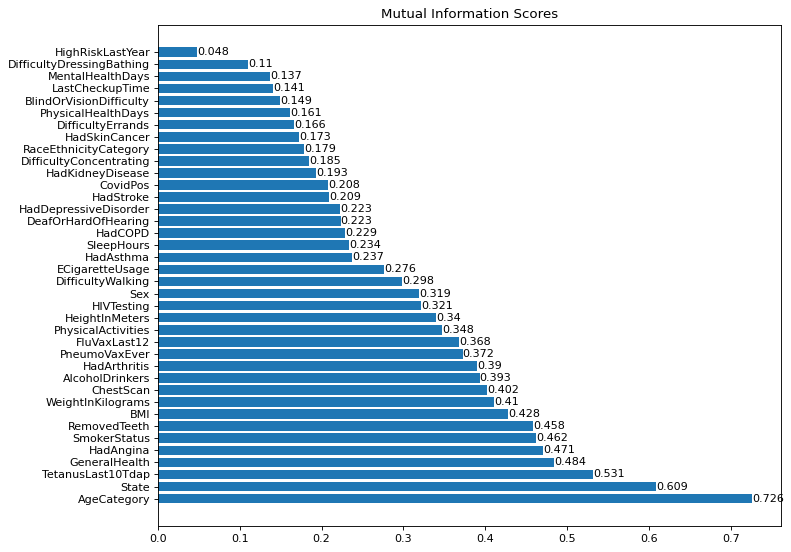

In [44]:
# Make the mutual information scores for each feature
from sklearn.feature_selection import mutual_info_classif
import warnings

# Suppress UserWarnings globally
warnings.filterwarnings("ignore", category=UserWarning)

# mi_scores
mi_scores_a = mutual_info_classif(X_train_re_a, y_train_re_a, discrete_features=bool_discrete_cols, random_state=42)
mi_scores_a = pd.Series(mi_scores_a, name='MI Scores', index=X_train_re_a.columns).sort_values(ascending=False)

# Plot
plt.figure(dpi=80, figsize=(10, 7))
width = np.arange(len(mi_scores_a))
ticks = list(mi_scores_a.index)
plt.barh(width, mi_scores_a)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")
for i, score in enumerate(mi_scores_a):
    plt.text(y=i, x=score+0.0002, s=str(round(score, 3)), va='center')

plt.tight_layout()
plt.show()

In [45]:
mi_scores_a[:5]

AgeCategory          0.725813
State                0.608537
TetanusLast10Tdap    0.531439
GeneralHealth        0.484158
HadAngina            0.470951
Name: MI Scores, dtype: float64

It's intriguing to note that feature selections differ before and after addressing class imbalance through resampling. The plot below illustrates the feature selections before the resampling process. In imbalanced datasets, features linked to the majority class often dominate the selection process. This disparity underscores the impact of class distribution on the prioritization of features and emphasizes the need for careful consideration in feature selection, especially in the context of imbalanced datasets.

![](https://raw.githubusercontent.com/sun712k/chronic-disease/a48c20efc4e0855fadeedf7a5b22b0631ff6fe41/image/MI%20before%20the%20resampling.png?token=GHSAT0AAAAAACMUF26ENT7QZNNYNAABDE2OZNAOJ3Q)

In [46]:
"""%%time
# check how many K best featuers are needed
KBEST_f1_scores = []

for k in range(10, len(X_train_resample_a.columns) +1):
    k_features = mi_scores_a[:k].index

    # Get f1 score from the model
    f1_scores = cross_val_score(rf, X_train_resample_a[k_features], y_train_resample_a, scoring='f1_macro', cv=3)
    mean_f1_score = f1_scores.mean()
    print(mean_f1_score)
    KBEST_f1_scores.append(mean_f1_score)"""

"%%time\n# check how many K best featuers are needed\nKBEST_f1_scores = []\n\nfor k in range(10, len(X_train_resample_a.columns) +1):\n    k_features = mi_scores_a[:k].index\n\n    # Get f1 score from the model\n    f1_scores = cross_val_score(rf, X_train_resample_a[k_features], y_train_resample_a, scoring='f1_macro', cv=3)\n    mean_f1_score = f1_scores.mean()\n    print(mean_f1_score)\n    KBEST_f1_scores.append(mean_f1_score)"

In [47]:
"""best_KBEST_f1_score = max(KBEST_f1_scores)
best_KBEST_num_features = KBEST_f1_scores.index(best_KBEST_f1_score) +11

# Print the result
print(f"Best F1 score ({best_KBEST_f1_score}) obtained with {best_KBEST_num_features} features.")"""

'best_KBEST_f1_score = max(KBEST_f1_scores)\nbest_KBEST_num_features = KBEST_f1_scores.index(best_KBEST_f1_score) +11\n\n# Print the result\nprint(f"Best F1 score ({best_KBEST_f1_score}) obtained with {best_KBEST_num_features} features.")'

Best F1 score (0.9306014884497191) obtained with 36 features.

In [48]:
"""# Create a Seaborn bar plot
n_cols = len(KBEST_f1_scores)

plt.figure(figsize=(14, 6))
ax = sns.barplot(x=np.arange(10, n_cols+10), y=KBEST_f1_scores, palette="Blues", width=0.5, )
ax.set(xlabel='Number of features selected using mutual information',
       ylabel='F1_Macro',
       ylim=(0, 1.0),
       xticklabels= np.arange(10, n_cols+10))

# Annotate the bars with the F1 scores
for i, score in enumerate(KBEST_f1_scores):
    ax.text(x=i, y=score + 0.05, s=str(round(score,3)), ha='center')

plt.tight_layout()
plt.show()"""

'# Create a Seaborn bar plot\nn_cols = len(KBEST_f1_scores)\n\nplt.figure(figsize=(14, 6))\nax = sns.barplot(x=np.arange(10, n_cols+10), y=KBEST_f1_scores, palette="Blues", width=0.5, )\nax.set(xlabel=\'Number of features selected using mutual information\',\n       ylabel=\'F1_Macro\',\n       ylim=(0, 1.0),\n       xticklabels= np.arange(10, n_cols+10))\n\n# Annotate the bars with the F1 scores\nfor i, score in enumerate(KBEST_f1_scores):\n    ax.text(x=i, y=score + 0.05, s=str(round(score,3)), ha=\'center\')\n\nplt.tight_layout()\nplt.show()'

The cells above took me around 4 hours to run(first cell_CPU times: user 3h 53min 39s). The results is as below.
![](https://raw.githubusercontent.com/sun712k/chronic-disease/main/image/K%20best%20features.png?token=GHSAT0AAAAAACMUF26EPJFPXI73IUT5RZPMZNAPGEQ)

The incremental improvement in F1 score with an increasing number of features suggests challenges in determining the optimal feature count using the current method. Considering this, exploring an alternative approach to feature selection becomes imperative for more effective model enhancement.

### Method 2. Embedded Methods

In contrast to wrapper methods, this approach eliminates the need for explicitly specifying the size of the feature set. Features are automatically removed based on their coefficients or feature importance values falling below a threshold. The threshold is calculated using various heuristics such as mean or median. This method offers a more automated and adaptive way of selecting features without the need for predefined feature set sizes.

#### Case A. X_train with oversampling all

In [49]:
%%time
from sklearn.feature_selection import SelectFromModel

# Use RFE for feature selection
sfm = SelectFromModel(estimator=rf)
SFM_selector = sfm.fit(X_train_re_a, y_train_re_a)
SFM_feature_mask_a = SFM_selector.get_support()
print(SFM_feature_mask_a)
X_train_refe_a = X_train_re_a.iloc[:, SFM_feature_mask_a]

# Adjust the validation data
X_val_fe_a = X_val.iloc[:, SFM_feature_mask_a]

rf.fit(X_train_refe_a, y_train_re_a)
y_val_pred = rf.predict(X_val_fe_a)

f1_score_val = f1_score(y_val, y_val_pred, average='macro')
print('accuracy score: ', accuracy_score(y_val, y_val_pred))
# Print the result
print(f"F1 score ({f1_score_val:.3f}) obtained with {len(X_train_refe_a.columns)} features which are {X_train_refe_a.columns}.")

[False  True False  True False False  True False  True False False False
 False  True  True False False False False  True False False False False
  True False  True  True  True False  True False False False  True  True
  True  True]
accuracy score:  0.7553351489776838
F1 score (0.376) obtained with 16 features which are Index(['HadAngina', 'GeneralHealth', 'AlcoholDrinkers', 'HadArthritis',
       'TetanusLast10Tdap', 'PneumoVaxEver', 'FluVaxLast12', 'RemovedTeeth',
       'SmokerStatus', 'AgeCategory', 'State', 'ChestScan', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object').
CPU times: user 11min 44s, sys: 1.63 s, total: 11min 45s
Wall time: 11min 46s


#### Case B. X_train with oversampling ratios

In [50]:
%%time
from sklearn.feature_selection import SelectFromModel

# Use RFE for feature selection
sfm = SelectFromModel(estimator=rf)
SFM_selector = sfm.fit(X_train_re_b, y_train_re_b)
SFM_feature_mask_b = SFM_selector.get_support()
X_train_refe_b = X_train_re_b.iloc[:, SFM_feature_mask_b]

# Adjust the validation data
X_val_fe_b = X_val.iloc[:, SFM_feature_mask_b]
rf.fit(X_train_refe_b, y_train_re_b)
y_val_pred = rf.predict(X_val_fe_b)

f1_score_val = f1_score(y_val, y_val_pred, average='macro')
print('accuracy score: ', accuracy_score(y_val, y_val_pred))
# Print the result
print(f"F1 score ({f1_score_val:.3f}) obtained with {len(X_train_refe_b.columns)} features which are {X_train_refe_b.columns}.")

accuracy score:  0.7616763546197309
F1 score (0.374) obtained with 15 features which are Index(['HadAngina', 'GeneralHealth', 'AlcoholDrinkers', 'HadArthritis',
       'PneumoVaxEver', 'DifficultyWalking', 'RemovedTeeth', 'SmokerStatus',
       'AgeCategory', 'State', 'ChestScan', 'SleepHours', 'HeightInMeters',
       'WeightInKilograms', 'BMI'],
      dtype='object').
CPU times: user 5min 31s, sys: 929 ms, total: 5min 32s
Wall time: 5min 33s


#### ***Summary***

SelectFromModel doesn't have a random state to produce the same result. Therefore, the number of features differs when the cells are executed. After several runs, at some point, the same feature set was selected for both Case A and Case B. 
Fifteen features are chosen, resulting in an F1 score of 0.392 in the case of oversampling all, and for oversampling ratios, it yields an F1 score of 0.389. The feature set will be used for the app.

Selected features: 'WeightInKilograms', 'PneumoVaxEver', 'HadArthritis', 'AgeCategory','AlcoholDrinkers', 'HeightInMeters', 'SmokerStatus', 'GeneralHealth','RemovedTeeth', 'State', 'ChestScan', 'HadAngina', 'DifficultyWalking','SleepHours', 'BMI'

In [51]:
mi_scores_a[:3]

AgeCategory          0.725813
State                0.608537
TetanusLast10Tdap    0.531439
Name: MI Scores, dtype: float64

In [52]:
# Compare feature selection from Mutual information and SFM method 
features_SFM = set(X_train_refe_a.columns) 
features_MI = set(mi_scores_a[:15].index)

# Find the difference
diff_features = features_SFM.difference(features_MI)
diff_features

{'HeightInMeters', 'SleepHours'}

The features identified through Mutual Information closely align with those obtained through the Selected From Model method.

In [53]:
X_train_A, y_train_A = X_train_refe_a.copy(), y_train_re_a.copy()
X_val_A = X_val_fe_a.copy()


In [54]:
X_train_B, y_train_B = X_train_refe_b.copy(), y_train_re_b.copy()
X_val_B = X_val_fe_b.copy()

# Step 6: Model Building

Some models offer support for the `class_weight` parameter, which proves beneficial in addressing imbalanced datasets, particularly in multiclass classification scenarios.

### Compare Path A, B, C

#### Path A. X_train with oversampling all and feature selection

In [66]:
%%time
## Randome Forest
rf = RandomForestClassifier(random_state = 42)

rf.fit(X_train_A, y_train_A)
y_val_pred = rf.predict(X_val_A)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.24      0.29      0.26      3108
           1       0.30      0.17      0.22       873
           2       0.21      0.13      0.16       471
           3       0.87      0.87      0.87     20149

    accuracy                           0.76     24601
   macro avg       0.41      0.36      0.38     24601
weighted avg       0.76      0.76      0.75     24601

CPU times: user 5min 38s, sys: 428 ms, total: 5min 39s
Wall time: 5min 39s


#### Path B. X_train with oversampling ratios, feature selection and class weights

In [59]:
%%time
## Randome Forest
rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

rf.fit(X_train_B, y_train_B)
y_val_pred = rf.predict(X_val_B)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.25      0.17      0.21      3108
           1       0.30      0.18      0.22       873
           2       0.22      0.12      0.16       471
           3       0.86      0.92      0.89     20149

    accuracy                           0.79     24601
   macro avg       0.41      0.35      0.37     24601
weighted avg       0.75      0.79      0.76     24601

CPU times: user 2min 17s, sys: 350 ms, total: 2min 17s
Wall time: 2min 17s


#### Path C. X_train with class weights(no feature selection)

In [57]:
%%time
## Randome Forest
rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

rf.fit(X_train_scaled, y_train)
y_val_pred = rf.predict(X_val)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.24      0.05      0.09      3108
           1       0.34      0.05      0.08       873
           2       0.38      0.03      0.06       471
           3       0.84      0.99      0.91     20149

    accuracy                           0.82     24601
   macro avg       0.45      0.28      0.28     24601
weighted avg       0.74      0.82      0.76     24601

CPU times: user 57.2 s, sys: 41.1 ms, total: 57.2 s
Wall time: 57.2 s


#### *Summary*

| Model Path                | F1 Score | Accuracy    |
|---------------------------|----------|-------------------------|
| Baseline                  | 0.34     | 0.77                      |
| **Path A:**               |          |                         |
| - Oversampling All        | 0.40     | 0.80                        |
| - Feature Selection (16 features) | 0.38 | 0.76       |
| **Path B:**               |          |                         |
| - Oversampling Ratios     | 0.40     | 0.79                        |
| - Feature Selection (15 features) | 0.37 | 0.76        |
| - Class Weight            | 0.37     | 0.79          |
| **Path C:**               |          |                         |
| - Class Weight (38 features) | 0.28 | 0.82        |


- Path A exhibits the highest F1 score (0.38), but it doesn't distinctly outperform others, accompanied by a slightly lower accuracy.
- Path C, despite having the highest accuracy (0.82), has a lower F1 score (0.28), indicating potential challenges with model precision and recall.

Considering factors such as the time required to proceed with the model, a lower number of instances, and a reasonable accuracy, Path B emerges as the preferable choice among the evaluated paths. It strikes a balance between precision and recall, offering a robust performance in predicting positive instances while accommodating class imbalances.

### Comparison to Other Models

While it is evident that features selected using the SelectFromModel (SFM) approach with Random Forest may not generalize well to other models, I decided to conduct tests with alternative models. Despite this caveat, exploring the performance of other models with the initially selected features allows for a comprehensive assessment of their adaptability and effectiveness across different algorithms.

##### KNeighborsClassifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_A, y_train_A)
y_val_pred = knn.predict(X_val_A)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.09      0.03      0.05      3108
           1       0.10      0.00      0.00       873
           2       0.00      0.00      0.00       471
           3       0.82      0.95      0.88     20149

    accuracy                           0.78     24601
   macro avg       0.25      0.25      0.23     24601
weighted avg       0.68      0.78      0.72     24601



##### XGBClassifier

In [ ]:
# Check the dtypes because categorical columns was set as 'object' and ensample tree models can't process that.
# X_train_A.info()

In [68]:
# Convert 'object' type to 'int'
cat_columns = X_train_A.select_dtypes(include='object').columns.tolist()
cat_columns
X_train_A[cat_columns] = X_train_A[cat_columns].astype(int)
X_train_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651369 entries, 0 to 651368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HadAngina          651369 non-null  int64  
 1   GeneralHealth      651369 non-null  int64  
 2   AlcoholDrinkers    651369 non-null  int64  
 3   HadArthritis       651369 non-null  int64  
 4   TetanusLast10Tdap  651369 non-null  int64  
 5   PneumoVaxEver      651369 non-null  int64  
 6   FluVaxLast12       651369 non-null  int64  
 7   RemovedTeeth       651369 non-null  int64  
 8   SmokerStatus       651369 non-null  int64  
 9   AgeCategory        651369 non-null  int64  
 10  State              651369 non-null  int64  
 11  ChestScan          651369 non-null  int64  
 12  SleepHours         651369 non-null  float64
 13  HeightInMeters     651369 non-null  float64
 14  WeightInKilograms  651369 non-null  float64
 15  BMI                651369 non-null  float64
dtypes:

In [69]:
X_val_A[cat_columns] = X_val_A[cat_columns].astype(int)
num_columns = ['SleepHours','HeightInMeters','WeightInKilograms','BMI']
X_val_A[num_columns] = X_val_A[num_columns].astype(float)
X_val_A.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24601 entries, 201932 to 113917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HadAngina          24601 non-null  int64  
 1   GeneralHealth      24601 non-null  int64  
 2   AlcoholDrinkers    24601 non-null  int64  
 3   HadArthritis       24601 non-null  int64  
 4   TetanusLast10Tdap  24601 non-null  int64  
 5   PneumoVaxEver      24601 non-null  int64  
 6   FluVaxLast12       24601 non-null  int64  
 7   RemovedTeeth       24601 non-null  int64  
 8   SmokerStatus       24601 non-null  int64  
 9   AgeCategory        24601 non-null  int64  
 10  State              24601 non-null  int64  
 11  ChestScan          24601 non-null  int64  
 12  SleepHours         24601 non-null  float64
 13  HeightInMeters     24601 non-null  float64
 14  WeightInKilograms  24601 non-null  float64
 15  BMI                24601 non-null  float64
dtypes: float64(4), int64(

In [70]:
# XGB Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_A, y_train_A)
y_val_pred = xgb.predict(X_val_A)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.21      0.30      0.25      3108
           1       0.10      0.29      0.15       873
           2       0.14      0.15      0.15       471
           3       0.89      0.76      0.82     20149

    accuracy                           0.67     24601
   macro avg       0.33      0.37      0.34     24601
weighted avg       0.76      0.67      0.71     24601



##### HistGradientBoostingClassifier

The HistGradientBoostingClassifier is frequently favored for large datasets, offering improved memory efficiency and faster training speeds. However, for small to medium-sized datasets, the traditional GradientBoostingClassifier remains a suitable choice.

An additional advantage of the HistGradientBoostingClassifier is its support for categorical features, a feature that will be utilized in this context. You can find an example demonstrating the use of categorical features [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_categorical.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-categorical-py).

In [71]:
# Hist Gradient Boosting Classifier
hgbc = HistGradientBoostingClassifier(random_state=42, categorical_features=cat_columns)
hgbc.fit(X_train_A, y_train_A)
y_val_pred = hgbc.predict(X_val_A)

print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.22      0.51      0.31      3108
           1       0.14      0.25      0.18       873
           2       0.14      0.33      0.20       471
           3       0.91      0.67      0.77     20149

    accuracy                           0.63     24601
   macro avg       0.35      0.44      0.37     24601
weighted avg       0.78      0.63      0.68     24601



Model Comparison with Oversampling All and Feature Selection (Path A):

| Model           | F1 Score (Average) | Accuracy |
|-----------------|--------------------|----------|
| Random Forest   | 0.37               | 0.79     |
| K-Nearest Neighbors | 0.23           | 0.78     |
| XGBoost         | 0.34               | 0.64     |
| HistGradientBoostingClassifier | 0.37 | 0.63 |

As anticipated, the Random Forest model demonstrates superior performance, excelling in both accuracy and F1 score simultaneously.

### Model Tuned Performance
After getting the baselines, let's see if we can improve on the indivdual model results! I mainly used grid search to tune the models. I also used Randomized Search for the Random Forest to simplify testing time.

|Model|Baseline|Tuned Performance|
|-----|--------|-----------------|
|Random Forest| 36.0%| ? |

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [74]:
# Simple performance report
def search_result(model_searched, model_name):
    print(model_name,':')
    print('Best f1 score: '+ str(model_searched.best_score_))
    print('Best parameters: '+ str(model_searched.best_params_))

In [76]:
%%time
# Randomized Search CV

rf = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
param_dist = {'n_estimators': [100,500],
                                  'max_depth': [5,10],
#                                   'min_samples_leaf': [2,5,10],
                                  'min_samples_split': [5,10]
             }

random_rf = GridSearchCV(rf, param_dist, cv = 3, scoring='f1_macro', refit=True)
best_random_rf = random_rf.fit(X_train_B, y_train_B)
search_result(best_random_rf, 'Random Forest Random Search')

Random Forest Random Search :
Best f1 score: 0.6197011997916374
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
CPU times: user 59min 46s, sys: 860 ms, total: 59min 47s
Wall time: 59min 50s


# Step 7. Results and Evaluation


In [83]:
# Apply feature selection to test dataset
X_test_final_b = X_test_scaled.iloc[:, SFM_feature_mask_b]
y_test_final_b = y_test.copy()

In [86]:
# Predict test data
rf_final = RandomForestClassifier(random_state=42, n_estimators=500, min_samples_split=10, max_depth=10,)
rf_final.fit(X_train_B, y_train_B)
y_pred = rf_final.predict(X_test_final_b)

print(classification_report(y_test_final_b, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.09      0.15      3109
           1       0.32      0.31      0.31       872
           2       0.30      0.42      0.35       471
           3       0.86      0.96      0.91     20150

    accuracy                           0.81     24602
   macro avg       0.47      0.44      0.43     24602
weighted avg       0.77      0.81      0.78     24602



After tuning the RandomForestClassifier with the specified parameters, the model's performance has shown a significant improvement, resulting in an F1 score of 0.43 and accuracy of 0.81.

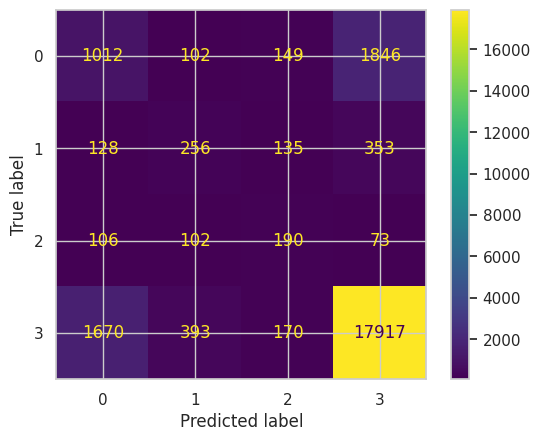

In [176]:
# Create Confusion Matrix
cm = confusion_matrix(y_test_final_b, y_pred_b, labels=rf_final_b.classes_)

# Create display of confusion matrix
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=rf_final_b.classes_)
# Plot confusion matrix
# plt.figure(figsize=(2,2))
cm_disp.plot(values_format='')
plt.show()

#### *Summary*

The test performance surpasses that of the validation set, with an accuracy of 81% and an F1 Macro score of 43%. The scores for predicting "Heart disease" are notably lower than those for "Diabetes" and "Heart disease & diabetes," indicating the greater difficulty in predicting heart disease using this dataset. Additionally, there is a significant number of false positives in class 0 (heart disease).

However, it's important to note that, after numerous iterations in this project, the results can vary when the cells are executed. The dynamic nature of the outcomes highlights the need for careful consideration and interpretation of the model's predictions.

### EDA

The selected features from SFM are 'GeneralHealth', 'ChestScan', 'AlcoholDrinkers', 'AgeCategory', 'PneumoVaxEver', 'RemovedTeeth', 'WeightInKilograms', 'SmokerStatus', 'HeightInMeters', 'State', 'HadAngina', 'HadArthritis', 'SleepHours', 'BMI'. **Among those, the top three features from Mutual Information are AgeCategory, State, and GeneralHealth. Therefore, for a brief EDA, focus will be placed on these three features.**

Variables can be divided into several groups as below (selected features are marked '(1)'), and it's observed that physical status has the most significant impact on the prediction of the two chronic diseases.

- **Demographics:**
'(1)State'
- **Physical Status:**
'(1)HeightInMeters'
'(1)WeightInKilograms'
'(1)BMI'
'RaceEthnicityCategory'
'(1)AgeCategory'
'Sex'
- **Personal Habits:**
'(1)AlcoholDrinkers'
'(1)SmokerStatus'
'ECigaretteUsage'
'(1)SleepHours'
'PhysicalActivities'
- **Health Information:**
'(1)GeneralHealth'
'PhysicalHealthDays'
'MentalHealthDays'
'DeafOrHardOfHearing'
'BlindOrVisionDifficulty'
'DifficultyConcentrating'
'DifficultyWalking'
'DifficultyDressingBathing'
'DifficultyErrands'
- **Medical Procedures and Vaccinations:**
'LastCheckupTime'
'(1)RemovedTeeth'
'(1)ChestScan'
'HIVTesting'
'FluVaxLast12'
'(1)PneumoVaxEver'
'TetanusLast10Tdap'
'HighRiskLastYear'
'CovidPos'
(Note: 'HighRiskLastYear' has original SAS Variable Name 'HIVRISK5' to ask if a person has a high risk of HIV/AIDS.)
- **Chronic Disease:** 
'(1)HadAngina','HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD','HadDepressiveDisorder','HadKidneyDisease', '(1)HadArthritis'

**State and Chronic Disease**

In [112]:
state_disease_proportion = df1.groupby('State')['ChronicDisease'].value_counts(normalize=True).unstack()
state_disease_proportion

ChronicDisease,Diabetes,Heart disease,Heart disease & Diabetes,No
State,,,,
Alabama,0.182440,0.036803,0.028391,0.752366
Alaska,0.097972,0.036505,0.014977,0.850546
Arizona,0.138070,0.044864,0.020875,0.796191
Arkansas,0.166667,0.051701,0.031293,0.750340
California,0.112637,0.028257,0.013736,0.845369
Colorado,0.083543,0.029269,0.011436,0.875751
Connecticut,0.107065,0.032456,0.013062,0.847417
Delaware,0.143852,0.032483,0.017633,0.806032
District of Columbia,0.091594,0.023188,0.011014,0.874203


The top 5 states with the highest proportion of diseases are: ['West Virginia', 'Arkansas', 'Alabama', 'Guam', 'Puerto Rico', 'Kentucky', 'Tennessee', 'Florida', 'Oklahoma', 'Louisiana', 'Virginia', 'Indiana', 'Ohio', 'South Carolina', 'Texas', 'Georgia', 'Arizona', 'Mississippi', 'Virgin Islands', 'New Mexico']


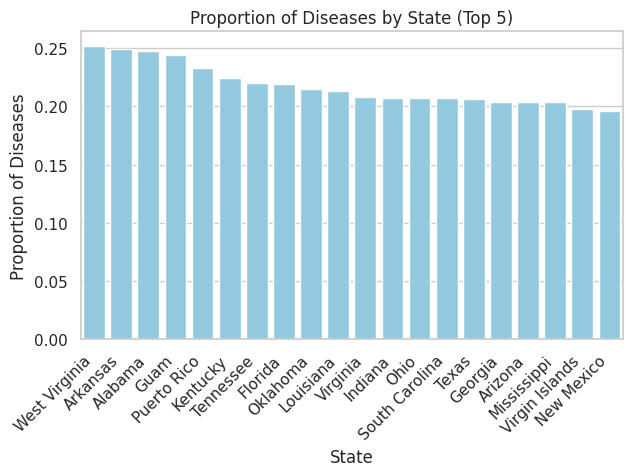

In [119]:
# Find the top 20 states with the highest proportion of diseases

state_disease_proportion
state_total_diseases = state_disease_proportion[['Diabetes','Heart disease','Heart disease & Diabetes']].sum(axis=1)
top_states = state_total_diseases.nlargest(20).index

# Visualize the proportion of diseases for the top 5 states
plt.figure(figsize=(7, 4))
sns.barplot(x=state_total_diseases[top_states].index, y=state_total_diseases[top_states], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Proportion of Diseases')
plt.title('Proportion of Diseases by State (Top 20)')
plt.show()

Half of the states with a higher proportion of diseases and all of the top 3 states are in the Southern region. This observation may indicate regional health disparities, suggesting that certain areas in the Southern region might face unique challenges or have distinct health profiles contributing to a higher prevalence of chronic diseases. The ranking could also reflect the effectiveness or lack thereof of public health initiatives in these states.

**General Health and Chronic Disease**

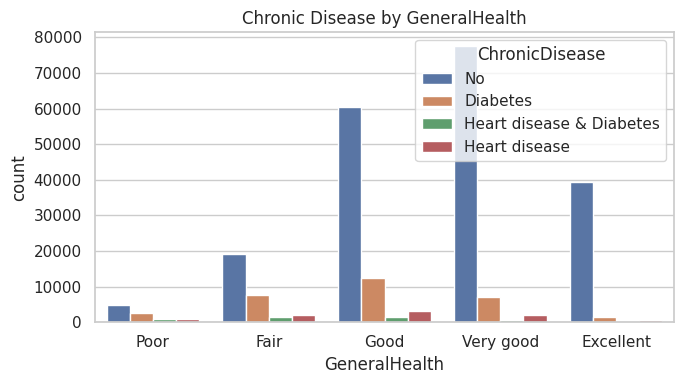

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
# sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(7, 4))

# # Plot 1: AgeCategory vs. ChronicDisease
# sns.countplot(x='AgeCategory', hue='ChronicDisease', data=df1, ax=axes[0])
# axes[0].set_title('Chronic Disease by AgeCategory')

# GeneralHealth vs. ChronicDisease
health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

sns.countplot(x='GeneralHealth', hue='ChronicDisease', data=df1, order=health_order)
plt.title('Chronic Disease by GeneralHealth')
plt.tight_layout()
plt.show()

Clearly, as we move towards a poorer health status, General Health shows a higher proportion of chronic diseases.

**Age and Chronic Disease**

In [96]:
# Calculate the proportion of 'Yes' for each 'AgeCategory'
proportions = df1.groupby('AgeCategory')['ChronicDisease'].value_counts(normalize=True).unstack().fillna(0)
proportions

ChronicDisease,Diabetes,Heart disease,Heart disease & Diabetes,No
AgeCategory,,,,
Age 18 to 24,0.016994,0.003582,0.000229,0.979195
Age 25 to 29,0.027545,0.003961,0.000270,0.968224
Age 30 to 34,0.041061,0.006069,0.000674,0.952195
Age 35 to 39,0.057961,0.007749,0.002242,0.932048
Age 40 to 44,0.080658,0.010075,0.003358,0.905909
Age 45 to 49,0.104160,0.016057,0.009013,0.870769
Age 50 to 54,0.129269,0.023152,0.012153,0.835426
Age 55 to 59,0.151368,0.031183,0.018853,0.798596
Age 60 to 64,0.157903,0.037389,0.021558,0.783151


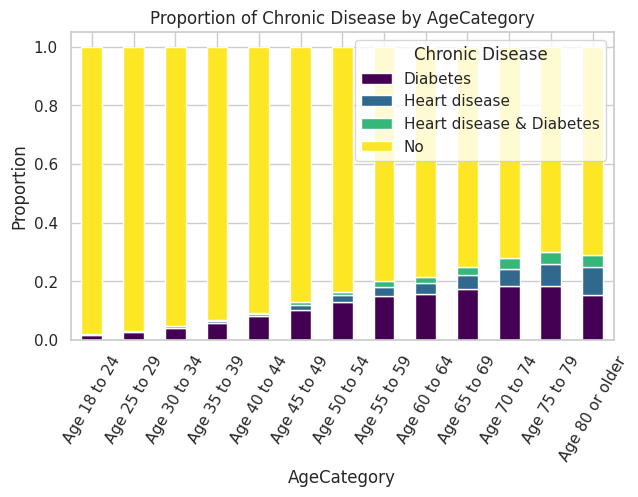

In [103]:
# Calculate the proportion of 'Yes' for each 'AgeCategory'
proportions = df1.groupby('AgeCategory')['ChronicDisease'].value_counts(normalize=True).unstack().fillna(0)

# Plot the stacked bar chart
proportions.plot(kind='bar', stacked=True, figsize=(7, 4), cmap='viridis')
# sns.barplot(x=proportions.index, y='Yes', data=proportions.reset_index(), hue='ChronicDisease', palette='viridis')

# Set labels and title
plt.xlabel('AgeCategory')
plt.ylabel('Proportion')
plt.title('Proportion of Chronic Disease by AgeCategory')

# Add a legend
plt.legend(title='Chronic Disease', loc='upper right')
plt.xticks(rotation=60)
# Show the plot
plt.show()

Interestingly enough, and perhaps as expected, the proportion of having the diseases increases with aging. Notably, from age 55 onwards, the proportion of people not having any of the two chronic diseases becomes less than 80%.

In [95]:
# Association between 'Age' and the chronic diseases
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df1['AgeCategory'], df1['ChronicDisease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

Chi-Square Value: 16128.303170993437
P-Value: 0.0


The Chi-Square statistic measures the difference between the observed and expected frequencies in a contingency table. A larger Chi-Square value indicates a larger difference between the observed and expected values. Diabetes has higher relavance with age than heart disease.

The extremely low P-Value suggests that the observed differences in the distribution of categories are not due to random chance, **providing evidence that age and two chronic disease are significantly associated.**

## *Conclusion, Recommendations, Next Steps*

#### Conclusion
In conclusion, the analysis and modeling efforts aimed at predicting chronic diseases have yielded valuable insights. Key observations include the significant impact of physical status, regional health disparities observed in the Southern region, and a discernible correlation between health status and the prevalence of chronic diseases. The machine learning models, especially through resampling, class-weight, parameter tuning, have exhibited improved performance, notably reflected in enhanced F1 scores.

However, it's essential to acknowledge that the prediction performance for each disease class is considerably lower compared to the non-disease class(f1 macro score: around 37-43%). Despite this, achieving an 80% accuracy is noteworthy. This level of accuracy can prove helpful in assessing the overall health status concerning chronic diseases. While there are challenges in predicting specific disease classes, the model demonstrates effectiveness in providing a holistic view of individuals' chronic disease risk, contributing valuable information for health assessments.

#### Recommendations
- **Targeted Interventions:** Given the observed regional health disparities, targeted interventions and public health initiatives should be tailored to address the specific challenges faced by states in the Southern region. Understanding the unique factors contributing to chronic diseases in these areas is crucial.

- **Health Promotion:** The correlation between health status(BMI,  and chronic diseases underscores the importance of health promotion and preventive measures. Encouraging healthier lifestyles and regular health check-ups can contribute to reducing the prevalence of chronic diseases.

#### Next Steps
- **Further Feature Exploration:** Delve into additional feature engineering techniques and combinations to further enhance the model's predictive power. The original dataset with 400 variables offers a plethora of possibilities for exploration. Investigating various feature sets in the future can reveal hidden patterns and relationships, providing a more comprehensive understanding of the factors influencing chronic diseases.
- **Model Interpretability:** Enhance model interpretability by using techniques such as SHAP (SHapley Additive exPlanations) values to understand the contribution of each feature to the model's predictions.
- **Alternative Model Evaluation:** Continue exploring alternative machine learning models to assess their adaptability and effectiveness across different algorithms. Consider additional models that support class imbalance handling.

#### Challenges
- **Cross-Validation Issues:** Challenges were encountered with the cross_val_score and gridsearch functions, which didn't seem to work as expected. This necessitated the creation of a separate validation set to check model performance, introducing a deviation from the preferred cross-validation approach.

- **Model Generalization:** The features selected using the SelectFromModel approach with Random Forest may not generalize well to other models. This limitation emphasizes the need for careful consideration in feature selection, especially in the context of imbalanced datasets.

Despite these challenges, the project has made significant strides in understanding and predicting chronic diseases, providing a foundation for future enhancements and optimizations.

# Step 8. Preparation for app

**Save cleaned dataset**(no oversampling, only feature selection)

In [47]:
X_train_re_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402339 entries, 0 to 402338
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   HadSkinCancer              402339 non-null  object 
 1   PneumoVaxEver              402339 non-null  object 
 2   RemovedTeeth               402339 non-null  object 
 3   CovidPos                   402339 non-null  object 
 4   GeneralHealth              402339 non-null  object 
 5   DifficultyDressingBathing  402339 non-null  object 
 6   AlcoholDrinkers            402339 non-null  object 
 7   HadStroke                  402339 non-null  object 
 8   ECigaretteUsage            402339 non-null  object 
 9   HIVTesting                 402339 non-null  object 
 10  FluVaxLast12               402339 non-null  object 
 11  HadAsthma                  402339 non-null  object 
 12  HadDepressiveDisorder      402339 non-null  object 
 13  TetanusLast10Tdap          40

In [270]:
# Save the cleaned dataset with feature selection
selected_features = list(X_train_refe_b.columns)
selected_features.append('ChronicDisease')
df_cleaned = df1[selected_features]
df_cleaned.to_csv('disease_2022_cleaned.csv', index=False)

In [271]:
df_cleaned.head()

,Sex,HadAngina,State,AgeCategory,HadArthritis,FluVaxLast12,SmokerStatus,PneumoVaxEver,RemovedTeeth,GeneralHealth,ChestScan,AlcoholDrinkers,DifficultyWalking,SleepHours,HeightInMeters,WeightInKilograms,BMI,ChronicDisease
0,Female,No,Alabama,Age 65 to 69,Yes,Yes,Former smoker,Yes,None of them,Very good,No,No,No,9.0,1.60,71.67,27.99,No
1,Male,No,Alabama,Age 70 to 74,Yes,Yes,Former smoker,Yes,None of them,Very good,No,No,No,6.0,1.78,95.25,30.13,Diabetes
2,Male,No,Alabama,Age 75 to 79,Yes,No,Former smoker,Yes,"6 or more, but not all",Very good,Yes,Yes,Yes,8.0,1.85,108.86,31.66,No
3,Female,No,Alabama,Age 80 or older,Yes,Yes,Never smoked,Yes,None of them,Fair,No,No,Yes,9.0,1.70,90.72,31.32,No
4,Female,No,Alabama,Age 80 or older,Yes,Yes,Never smoked,Yes,1 to 5,Good,No,No,No,5.0,1.55,79.38,33.07,No


**Save pickle model**

Must check if selected_features are the same as the features set in Streamlit app.py

In [89]:
# Create pickle model
selected_features =['PneumoVaxEver', 'HadArthritis',
 'AgeCategory', 'AlcoholDrinkers', 'SmokerStatus', 'GeneralHealth'
 , 'RemovedTeeth', 'State', 'ChestScan', 'HadAngina', 'DifficultyWalking','BMI','SleepHours','WeightInKilograms', 'HeightInMeters', ]
selected_features.append('ChronicDisease')
df_cleaned = df1[selected_features]
df_cleaned.to_csv('disease_2022_cleaned.csv', index=False)

In [90]:
# run before Step 6. Feature Selection and run this
SFM_feature_b = ['PneumoVaxEver', 'HadArthritis','AgeCategory', 'AlcoholDrinkers',
                 'SmokerStatus', 'GeneralHealth', 'RemovedTeeth', 'State', 'ChestScan',
                 'HadAngina', 'DifficultyWalking','BMI','SleepHours','WeightInKilograms', 'HeightInMeters', ]
X_train_refe_b = X_train_re_b[SFM_feature_b]

X_train_B, y_train_B = X_train_refe_b.copy(), y_train_re_b.copy()

# Predict test data
rf_final_b = RandomForestClassifier(random_state=42, n_estimators=20, class_weight = 'balanced', min_samples_split=10)
rf_final_b.fit(X_train_B, y_train_B)

X_test_final_b = X_test_scaled[SFM_feature_b]
y_test_final_b = y_test.copy()
y_pred_b = rf_final_b.predict(X_test_final_b)

print(classification_report(y_test_final_b, y_pred_b))

              precision    recall  f1-score   support

           0       0.38      0.22      0.27      3109
           1       0.30      0.31      0.31       872
           2       0.26      0.26      0.26       471
           3       0.87      0.93      0.90     20150

    accuracy                           0.80     24602
   macro avg       0.45      0.43      0.44     24602
weighted avg       0.78      0.80      0.79     24602



In [91]:
# Saving the model
import pickle
pickle.dump(rf_final_b, open('rf_model.pkl', 'wb'))

# import joblib
# # Save the model
# joblib.dump(rf_final_b, 'rf_model.joblib')

In [92]:
import os

# Check current working directory
print(os.getcwd())

# List files in the current directory
print(os.listdir())

file_path = 'rf_model.pkl'
file_size_bytes = os.path.getsize(file_path)

# Convert bytes to kilobytes (1 KB = 1024 bytes)
file_size_kb = file_size_bytes / 1024.0
# Convert bytes to megabytes (1 MB = 1024 KB)
file_size_mb = file_size_kb / 1024.0
print(f"File Size: {file_size_bytes} bytes / {file_size_kb:.2f} KB / {file_size_mb:.2f} MB")

/kaggle/working
['.virtual_documents', 'rf_model.pkl', 'disease_2022_cleaned.csv']
File Size: 129072072 bytes / 126046.95 KB / 123.09 MB


In [71]:
# import os

# file_to_remove = 'cleaned_dataset.csv'  # Replace with the actual file name you want to remove

# # Check if the file exists before attempting to remove it
# if os.path.exists(file_to_remove):
#     os.remove(file_to_remove)
#     print(f"{file_to_remove} removed successfully.")
# else:
#     print(f"{file_to_remove} does not exist.")

In [72]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory = os.curdir, file_name = 'directory.zip'):
    """
    zip all the files in a directory
    
    Parameters
    _____
    directory: str
        directory needs to be zipped, defualt is current working directory
        
    file_name: str
        the name of the zipped file (including .zip), default is 'directory.zip'
        
    Returns
    _____
    Creates a hyperlink, which can be used to download the zip file)
    """
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                pass
            else:
                zip_ref.write(os.path.join(folder, file))

    return FileLink(file_name)

In [73]:
zip_dir()

/kaggle/working/directory.zip

This project underwent numerous iterative processes, involving experimentation with various oversampling and feature selection methods, as well as model selection and tuning. Additionally, challenges arose with the initial pickle model, which exceeded 1GB and posed difficulties in uploading to GitHub. To address this, the model had to be tweaked to minimize its size. Furthermore, adjustments had to be made to the version of scikit-learn for compatibility.

**Note:**
In the event of encountering a "ValueError: node array from the pickle has an incompatible dtype" issue in Streamlit, downgrading the scikit-learn version to 1.2.2 using the command `pip install scikit-learn==1.2.2` can resolve the problem. This adjustment is crucial for maintaining compatibility and addressing potential dtype inconsistencies in the pickle file.

[Reference](https://discuss.streamlit.io/t/valueerror-node-array-from-the-pickle-has-an-incompatible-dtype/46682/1) 
[Scikit-Learn Model Persistence](https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations)

In [74]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /opt/conda/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, Boruta, category-encoders, cesium, eli5, esda, fastai, gplearn, hep-ml, hmmlearn, hpsklearn, hypertools, imbalanced-learn, kmapper, kmodes, librosa, lightgbm, lime, mapclassify, mlxtend, nilearn, pynndescent, qudida, rgf-python, scattertext, scikit-learn-intelex, scikit-optimize, scikit-plot, segregation, shap, sklearn-pandas, spopt, spreg, TPOT, tsfresh, umap-learn, vecstack, woodwork, yellowbrick
Note: you may need to restart the kernel to use updated packages.


In [62]:
# pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/d0/0b/26ad95cf0b747be967b15fb71a06f5ac67aba0fd2f9cd174de6edefc4674/scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 61.2 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
